In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13355072541683475429
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1449056665
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12720899543806213100
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-02-20_p180_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_713'
postfix_time_seq = '_190812_1645'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_p180"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__traindata_190815_713.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__testdata_190815_713.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__traindata_190812_1645.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__testdata_190812_1645.pkl
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_48 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 45)                3195

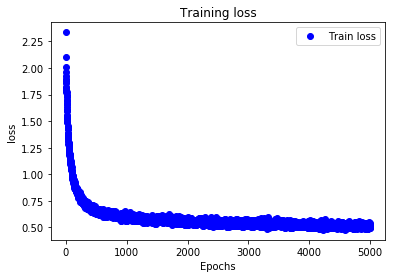

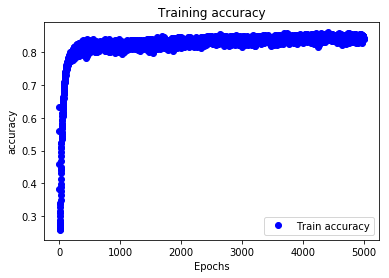

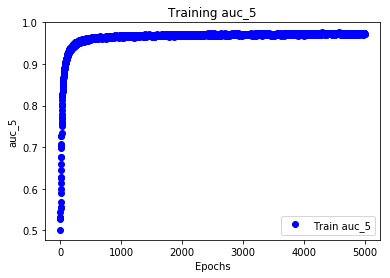

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_56 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_57 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_58 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 15)              

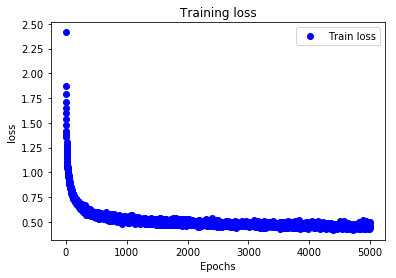

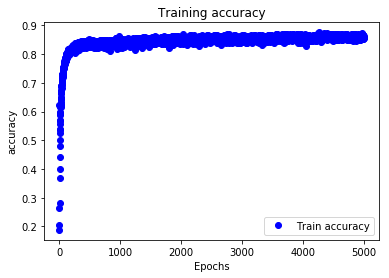

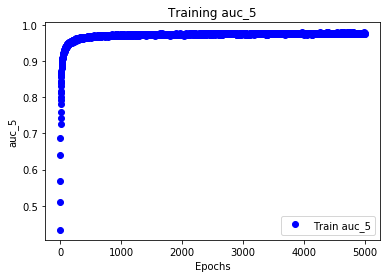

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_60 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_61 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_62 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 15)              

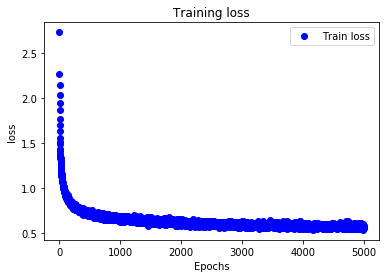

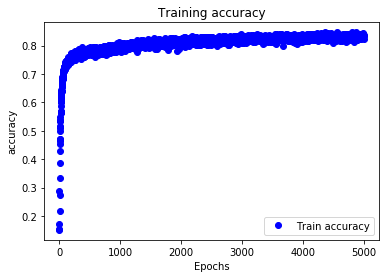

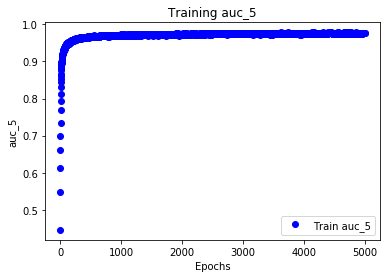

Validation AUC aggregating the results of 3 folds: 0.8971427251830563

Retraining the model using the full training set for proper testing...
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_64 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_65 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_66 (Dropout)         (None, 30)    

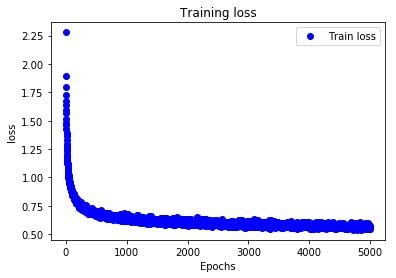

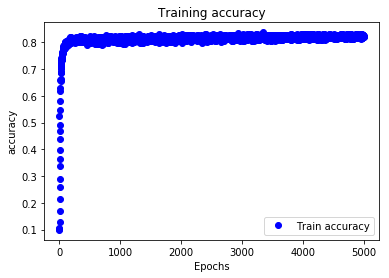

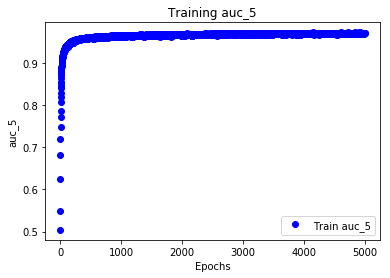

- Saving the model to ../data/models/MLP_enriched_time_seq24000_6000_p180/...
Saving model to ../data/models/MLP_enriched_time_seq24000_6000_p180/time_2018-02-20_p180_bg__sequential_12_190817_2122.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.44763 0.55237]
 [0.00039 0.0031 ]]
AUC 0.850
Confusion matrix:
[[6932 8554]
 [   6   48]]
- Activating existing experiment 'MLP_enriched_time_seq24000_6000_p180', the following results will be saved in it...
- Tracking the experiment on mlflow...
- Experiment tracked.


In [7]:
with tf.device("/device:GPU:0"):
    experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                postfix_time_seq_val, valid_code, indexfile,
                         experiment_name=expname, 
                         hidden_layers_no=4,  #4
                         hidden_nodes= [70, 45,30,15],
                         optimizer=Adam(0.001),
                         hl_activations=[tf.nn.relu]*4,       
                         dropout=[0.5]*4,            
                         loss_func = tf.keras.losses.BinaryCrossentropy(),
                         metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                         to_monitor=('accuracy', 0.9),
                         validation_ep=True,
                         epochs=5000, 
                         batch_size=2048,
                         use_batch_and_steps=False,
                         class_1_weight=25,
                         pred_threshold = 0.55,
                         verbose=0,
                         early_stopping=True, 
                         save_model=True, 
                         save_results_for_viz=False,
                         mlf_tracking=True)